In [ ]:
import glob
import os
import librosa
import time
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
emotions={
  '01':'neutral'
  ,
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fear',
  '07':'disgust',
  '08':'surprised'
}


tess_emotions=['angry','disgust','fear','ps','happy','sad']


ravdess_emotions=['neutral','calm','angry', 'happy','disgust','sad','fear','surprised']

observed_emotions = ['sad','angry','happy','disgust','surprised','neutral','calm','fear']
#observed_emotions = ['sad','happy']

In [ ]:
def extract_feature(file_name, mfcc):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((mfccs))
        return result
    else:
        return None

In [ ]:
def dataset_options():
    # choose datasets
    ravdess = True
    tess = True
    ravdess_speech = False
    ravdess_song = False
    data = {'ravdess':ravdess, 'ravdess_speech':ravdess_speech, 'ravdess_song':ravdess_song, 'tess':tess}
    print(data)
    return data

In [ ]:
def load_data(test_size=0.2):
    x,y=[],[]

    # feature to extract
    mfcc = True

    data = dataset_options()
    paths = []
    if data['ravdess']:

        # paths.append("kaggle/input/ravdess-emotional-*/audio_*_actors_01-24/*/Actor_*/*.wav")
        paths.append("/content/drive/MyDrive/data/wav/*/Actor_*/*.wav")

    elif data['ravdess_speech']:
        #paths.append("kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_*/*.wav")
        paths.append("/content/drive/MyDrive/data/wav/audio_speech_actors_01-24/Actor_*/*.wav")

    elif data['ravdess_song']:
        #paths.append("kaggle/input/ravdess-emotional-song-audio/audio_song_actors_01-24/Actor_*/*.wav")
        paths.append("/content/drive/MyDrive/data/wav/Ravdess_song/Actor_*/*.wav")

    for path in paths:
        for file in glob.glob(path):
            file_name=os.path.basename(file)
            emotion=emotions[file_name.split("-")[2]] #to get emotion according to filename. dictionary emotions is defined above.
            if emotion not in observed_emotions: #options observed_emotions - RAVDESS and TESS, ravdess_emotions for RAVDESS only
                continue
            feature=extract_feature(file, mfcc)
            x.append(feature)
            y.append(emotion)
    if data['tess']:
        for file in glob.glob("/content/drive/MyDrive/data/TESS Toronto emotional speech set data/*AF_*/*.wav"):
            file_name=os.path.basename(file)
            emotion=file_name.split("_")[2][:-4] #split and remove .wav
            if emotion == 'ps':
                emotion = 'surprised'
            if emotion not in observed_emotions: #options observed_emotions - RAVDESS and TESS, ravdess_emotions for RAVDESS only
                continue
            feature=extract_feature(file, mfcc)
            x.append(feature)
            y.append(emotion)
    return {"X":x,"y":y}

In [ ]:

pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.3 MB/s eta 0:00:00


In [ ]:
start_time = time.time()

Trial_dict = load_data(test_size = 0.3)

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

{'ravdess': True, 'ravdess_speech': False, 'ravdess_song': False, 'tess': True}
--- Data loaded. Loading time: 0.0026807785034179688 seconds ---


In [ ]:
X = pd.DataFrame(Trial_dict["X"])
y = pd.DataFrame(Trial_dict["y"])

In [ ]:
X.shape, y.shape

((0, 0), (0, 0))

In [ ]:
#renaming the label column to emotion
y=y.rename(columns= {0: 'emotion'})

In [ ]:
#concatinating the attributes and label into a single dataframe
data = pd.concat([X, y], axis =1)

In [ ]:
data.head()

""


KeyError: 'emotion'

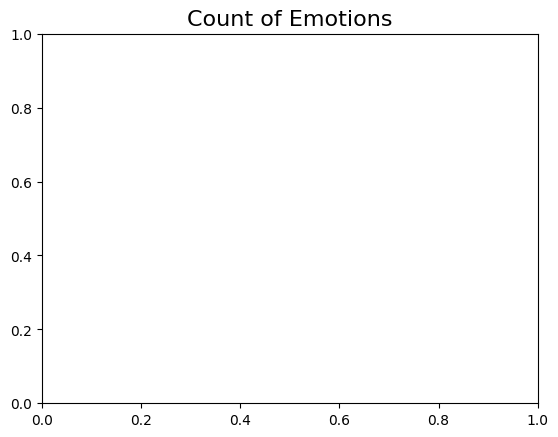

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(data=data, x='emotion', order=data['emotion'].value_counts().index)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


In [ ]:
#reindexing to shuffle the data at random
data = data.reindex(np.random.permutation(data.index))

In [ ]:
# Storing shuffled ravdess and tess data to avoid loading again
data.to_csv("RAVTESS_MFCC_Observed.csv")

In [ ]:
# speech emotion recognition

In [ ]:


starting_time = time.time()
data = pd.read_csv("./RAVTESS_MFCC_Observed.csv")
print("data loaded in " + str(time.time()-starting_time) + "ms")

print(data.head())


data loaded in 0.03840970993041992ms
   Unnamed: 0          0          1          2          3          4  \
0         505 -615.99640  76.315330 -12.541039  18.877080   3.852680   
1        1539 -390.24445  65.916336  26.215246  38.353092 -12.048004   
2         473 -462.67886  18.256329 -54.202450  -1.108679 -12.313275   
3        1873 -427.14963  76.537870   7.327984  42.409534  -6.831890   
4        2366 -369.24902  42.453000 -12.481344  18.837220 -18.227434   

           5          6          7          8  ...         31         32  \
0   1.571579 -14.081520  -7.234631  -3.617209  ...   1.374290   0.420803   
1   9.616499 -12.680340  -2.616339  -2.688254  ...  10.948750   8.410737   
2 -13.861100 -22.440460  -7.047171 -21.436087  ...   4.241406   0.897156   
3   2.171045  -9.058948  -8.979313  -9.869923  ...  10.748813  24.074635   
4   2.600628  -5.241814 -17.225275 -11.086796  ...  10.529793   3.868893   

          33         34         35         36        37        38        

In [ ]:
data.shape


(4240, 42)

In [ ]:
#printing all columns
data.columns


Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', 'emotion'],
      dtype='object')

In [ ]:
#dropping the column Unnamed: 0 to removed shuffled index
data = data.drop('Unnamed: 0',axis=1)

In [ ]:
data.columns


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', 'emotion'],
      dtype='object')

In [ ]:
#separating features and target outputs
X = data.drop('emotion', axis = 1).values
y = data['emotion'].values

In [ ]:
print(y)


['happy' 'sad' 'happy' ... 'fear' 'happy' 'sad']


In [ ]:
# SVM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X.shape, y.shape


((4240, 40), (4240,))

In [ ]:
np.unique(y)


array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')

In [ ]:
import time

starting_time = time.time()
svclassifier.fit(X_train, y_train)
print("Trained model in %s ms " % str(time.time() - starting_time))

Trained model in 77.07592606544495 ms 


In [ ]:
y_pred = svclassifier.predict(X_test)

              precision    recall  f1-score   support

       angry       0.77      0.89      0.82       131
        calm       0.45      0.68      0.54        28
     disgust       0.80      0.78      0.79       127
        fear       0.81      0.76      0.79       116
       happy       0.71      0.77      0.74       127
     neutral       0.83      0.79      0.81        95
         sad       0.81      0.79      0.80       115
   surprised       0.88      0.65      0.75       109

    accuracy                           0.77       848
   macro avg       0.76      0.76      0.75       848
weighted avg       0.79      0.77      0.78       848

----accuracy score 77.47641509433963 ----


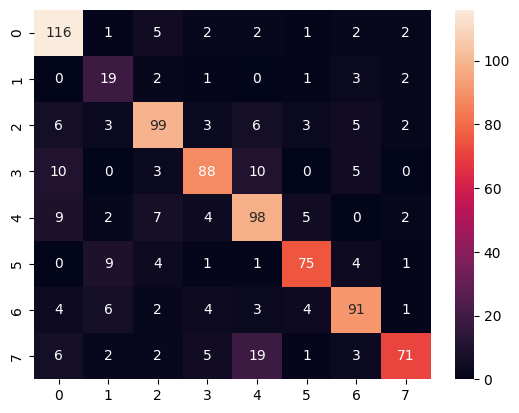

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,y_pred))

acc = float(accuracy_score(y_test,y_pred))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [ ]:
train_acc = float(svclassifier.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svclassifier.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 81.60377358490565 ----
----test accuracy score 77.47641509433963 ----


In [ ]:
# cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

# no. of folds cv = 5
cv_results = cross_val_score(svclassifier, X, y, cv = 5)
print(cv_results)

[0.73938679 0.74056604 0.79245283 0.75117925 0.76061321]


Trained model in 1.1077837944030762 ms 
              precision    recall  f1-score   support

       angry       0.81      0.89      0.84       131
        calm       0.40      0.68      0.50        28
     disgust       0.81      0.80      0.80       127
        fear       0.85      0.81      0.83       116
       happy       0.71      0.78      0.74       127
     neutral       0.87      0.80      0.84        95
         sad       0.84      0.77      0.81       115
   surprised       0.85      0.69      0.76       109

    accuracy                           0.79       848
   macro avg       0.77      0.78      0.77       848
weighted avg       0.80      0.79      0.79       848

----accuracy score 78.89150943396226 ----


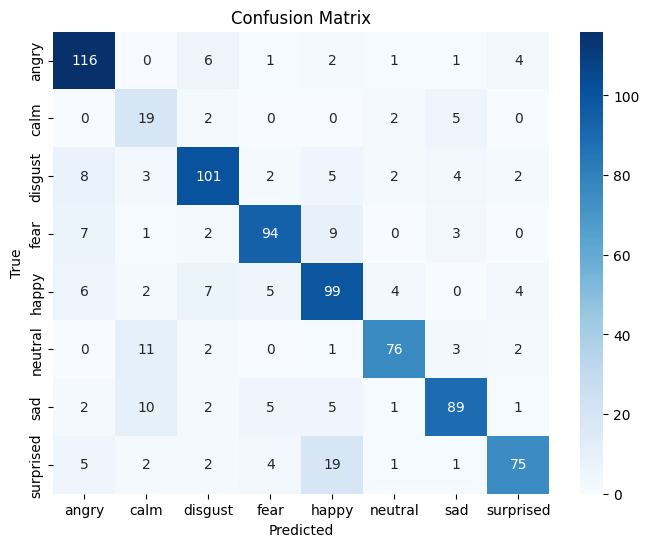

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sn

# Assuming X_train, X_test, y_train, y_test are available

# Step 1: Feature Engineering (if needed)
# Consider exploring different feature extraction techniques

# Step 2: Model Selection and Hyperparameter Tuning
parameters = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svc = SVC()
grid_search = GridSearchCV(svc, parameters, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Select the best model from the grid search
best_svc = grid_search.best_estimator_

# Step 3: Training the Best Model
starting_time = time.time()
best_svc.fit(X_train, y_train)
print("Trained model in %s ms " % str(time.time() - starting_time))

# Step 4: Prediction and Evaluation
y_pred = best_svc.predict(X_test)

print(classification_report(y_test, y_pred))

acc = float(accuracy_score(y_test, y_pred)) * 100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=best_svc.classes_, columns=best_svc.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SVM with Grid Search for Hyperparameter Tuning
parameters = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svc = SVC()
grid_search = GridSearchCV(svc, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_svc = grid_search.best_estimator_

# Prediction and Evaluation
y_pred = best_svc.predict(X_test)

print(classification_report(y_test, y_pred))
acc = float(accuracy_score(y_test, y_pred)) * 100
print("----accuracy score %s ----" % acc)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)
rf_classifier.fit(X_train, y_train)

# Prediction and Evaluation
y_rf_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_rf_pred))
acc_rf = float(accuracy_score(y_test, y_rf_pred)) * 100
print("----Random Forest accuracy score %s ----" % acc_rf)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


#splitting dataset into train/ test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: svc_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
svc_unscaled = SVC(kernel = 'linear').fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)))

In [ ]:
#Generalization check¶
#Checking for overfitting or underfitting by comparing the training and testing scores of the model


In [ ]:
train_acc = float(svc_scaled.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svc_scaled.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

In [ ]:
scaled_predictions = svc_scaled.predict(X_test)

In [ ]:
#Classification reports and Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,scaled_predictions))

acc = float(accuracy_score(y_test,scaled_predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,scaled_predictions)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time
starting_time = time.time()
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
print("Trained model in %s ms " % str(time.time() - starting_time))

In [ ]:
train_acc = float(knn.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(knn.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time
# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=29)
dt.fit(X_train, y_train)

print("Trained model in %s ms " % str(time.time() - starting_time))

In [ ]:
train_acc = float(dt.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(dt.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)


In [ ]:
train_acc = float(rf.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(rf.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

In [ ]:
#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time

# Measure the starting time
starting_time = time.time()

# Create a KNeighborsClassifier with 8 neighbors (you can adjust this number)
knn = KNeighborsClassifier(n_neighbors=8)

# Train the model with your training data
knn.fit(X_train, y_train)

# Calculate and print the time taken in milliseconds
print("Trained model in %s ms " % str(time.time() - starting_time))


In [ ]:
train_acc = float(knn.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(knn.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

In [ ]:
#GMM

In [ ]:
from sklearn.mixture import GaussianMixture
import time

# Measure the starting time
starting_time = time.time()

# Create a GaussianMixture model with a specified number of components (clusters)
n_components = 2  # You can adjust this number
gmm = GaussianMixture(n_components=n_components, random_state=0)

# Fit the model to your data
gmm.fit(X_train)

# Calculate and print the time taken in milliseconds
print("Trained model in %s ms" % str((time.time() - starting_time) * 1000))


In [ ]:
train_acc = float(gmm.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(gmm.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time

# Measure the starting time
starting_time = time.time()

# Create a GradientBoostingClassifier with the desired parameters
n_estimators = 100  # You can adjust this number
learning_rate = 0.4  # You can adjust the learning rate
gb_classifier = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=0)

# Fit the model to your training data
gb_classifier.fit(X_train, y_train)

# Calculate and print the time taken in milliseconds
print("Trained model in %s ms" % str((time.time() - starting_time) * 1000))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
starting_time = time.time()
n_estimators = 100
learning_rate = 0.4
gb_classifier = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=0)


gb_classifier.fit(X_train, y_train)


print("Trained model in %s ms" % str((time.time() - starting_time) * 1000))


In [ ]:
train_acc = float(gb_classifier.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(gb_classifier.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

In [ ]:

from sklearn.neural_network import MLPClassifier
import time

# Measure the starting time
starting_time = time.time()

# Create an MLPClassifier with the desired parameters
hidden_layer_sizes = (100, 50)  # You can adjust the number of neurons in hidden layers
alpha = 0.0001  # You can adjust the regularization parameter
mlp_classifier = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha, random_state=0)

# Fit the model to your training data
mlp_classifier.fit(X_train, y_train)

# Calculate and print the time taken in milliseconds
print("Trained model in %s ms" % str((time.time() - starting_time) * 1000))


In [ ]:
train_acc = float(mlp_classifier.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(mlp_classifier.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

In [ ]:
#gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time


starting_time = time.time()

# Create a GradientBoostingClassifier with the desired parameters
n_estimators = 100  # Number of boosting stages (you can adjust this)
learning_rate = 0.1  # Learning rate (you can adjust this)
gb_classifier = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=0)

# Fit the model to your training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# Calculate and print the time taken in milliseconds
print("Gradient Boosting classification completed in %s ms" % str((time.time() - starting_time) * 1000))

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


In [ ]:
train_acc = float(gb_classifier.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(gb_classifier.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

In [ ]:
#LSTM

In [ ]:
import glob
import os
import librosa
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical


# Encode the labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM input
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for more epochs

model.fit(X_train_lstm, y_train_encoded, epochs=200, batch_size=15, validation_data=(X_test_lstm, y_test_encoded))

# Evaluate the model

accuracy = model.evaluate(X_test_lstm, y_test_encoded)[1]
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

In [ ]:
train_accuracy = history.history['accuracy'][-1]  # Last epoch training accuracy
val_accuracy = history.history['val_accuracy'][-1]  # Last epoch validation accuracy

# Evaluate the model on the test set
test_accuracy = model.evaluate(X_test_lstm, y_test_encoded)[1]

# Print the final training and test accuracy
print("Final Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

In [ ]:

# Extract training and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Evaluate the model on the test set
test_accuracy = model.evaluate(X_test_lstm, y_test_encoded)[1]

# Print the final test accuracy
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Plot training and validation accuracy over epochs
import matplotlib.pyplot as plt

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
#GRU

In [ ]:
import glob
import os
import librosa
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.utils import to_categorical


# Encode the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for GRU input
X_gru = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_gru, y_onehot, test_size=0.2, random_state=42)

# Build the GRU model
model = Sequential()
model.add(GRU(128, input_shape=(X_gru.shape[1], X_gru.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=15, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Print the final training and test accuracy
train_accuracy = history.history['accuracy'][-1]  # Last epoch training accuracy
val_accuracy = history.history['val_accuracy'][-1]  # Last epoch validation accuracy
print("Final Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Final Validation Accuracy: {:.2f}%".format(val_accuracy * 100))


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Print the final training and test accuracy
train_accuracy = history.history['accuracy'][-1]  # Last epoch training accuracy
val_accuracy = history.history['val_accuracy'][-1]  # Last epoch validation accuracy
print("Final Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Final Validation Accuracy: {:.2f}%".format(val_accuracy * 100))

In [ ]:
# Plot training and validation accuracy over epochs
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
pip install wavio

In [ ]:
pip install scipy

In [ ]:
!sudo apt-get install libportaudio2


In [ ]:
!pip install sounddevice

In [ ]:

from scipy.io.wavfile import write
import wavio as wv

In [ ]:
import sounddevice as sd

In [ ]:
# Sampling frequency
freq = 44100

# Recording duration
duration = 5

In [ ]:
"""import IPython.display as ipd
import sounddevice as sd
import soundfile as sf
import librosa
samplerate = 48000
duration = 4 # seconds
filename = 'quran.wav'
print("start")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,channels=1, blocking=True)
print("end")
sd.wait()
sf.write(filename, mydata, samplerate)
#reading the voice commands
samples, sample_rate = librosa.load(filename , sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000)"""

In [ ]:
!apt-get install -y portaudio19-dev


In [ ]:
!pip install sounddevice


In [ ]:
!pip install pyaudio


In [ ]:
"""import numpy as np
import io
import IPython.display as ipd
import sounddevice as sd

duration = 5  # You can change the duration as needed
audio_data = sd.rec(int(duration * 44100), samplerate=44100, channels=2, blocking=True)
ipd.Audio(audio_data, rate=44100)"""


In [ ]:
###AUDIO SENTIMENT ANALYSIS

In [ ]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random, os
import librosa, IPython
import librosa.display as lplt
from skimage.io import imread
seed = 12
np.random.seed(seed)

In [ ]:
trainPath = '/content/drive/MyDrive/sentiment classification data/TRAIN/'
testPath = '/content/drive/MyDrive/sentiment classification data/TEST/'
df_base = pd.read_csv('/content/drive/MyDrive/sentiment classification data/TRAIN.csv')
df_base.head()

In [ ]:
print("Dataset has",df_base.shape[0],"samples")
print("Count of Positive and Negative samples")
df_base['Class'].value_counts().reset_index()

In [ ]:
sample_rate = 44100
def loadAudio(fp):
    return librosa.load(fp, res_type='kaiser_fast', duration=2.5, offset=0.5, sr=sample_rate)

In [ ]:
def scanFeatures(path, avgFeat=0):
    features = []
    minFeat = sys.maxsize
    maxFeat = 0
    files = sorted(os.listdir(path))
    print("Scanning", path)

    for i, fp in enumerate(files):
        X, sr = loadAudio(os.path.join(path, fp))

        f = librosa.feature.melspectrogram(y=X, sr=sample_rate)
        f = librosa.amplitude_to_db(f, ref=np.max)

        shapeY = f.shape[1]
        if shapeY < minFeat:
            minFeat = shapeY

        if shapeY > maxFeat:
            maxFeat = shapeY

        features.append(f)
    if avgFeat == 0:
        avgFeat = int((minFeat+maxFeat)/2)
    feat_mat = np.zeros((len(files), f.shape[0], avgFeat))
    for i, x in enumerate(features):
        xWidth = min(x.shape[1],avgFeat)
        feat_mat[i, :, :xWidth] = x[:,:xWidth]
    return feat_mat, files

In [ ]:
f_dim = 128
train_data, train_files = scanFeatures(trainPath, f_dim)
test_data, test_files = scanFeatures(testPath, train_data.shape[1])
print(train_data.shape)
print(test_data.shape)

In [ ]:
def saveImg(f, fp):
    f = np.flip(f, axis=0)
    plt.figure()
    plt.axis('off')
    plt.imsave(fp, f, format='png')
    plt.clf()

In [ ]:
###SAVING FEATURE TO IMAGE

In [ ]:
def saveFeatureToImage(path, saveDir, avgFeat=0):
    global sample_rate
    files = sorted(os.listdir(path))
    print("Scanning", path)

    for i, fp in enumerate(files):
        X, sr = loadAudio(os.path.join(path, fp))

        f = librosa.feature.melspectrogram(y=X, sr=sample_rate)
        f = librosa.amplitude_to_db(f, ref=np.max)

        img = np.zeros((f.shape[0], avgFeat))
        xWidth = min(f.shape[1],avgFeat)
        img[:, :xWidth] = f[:,:xWidth]
        fname = os.path.join(saveDir, fp.split('.')[0] + '.png')
        saveImg(img, fname)

In [ ]:
f_dim = 128
train_img_dir = './train_images'
test_img_dir = './test_images'
if not os.path.exists(train_img_dir):
    os.mkdir(train_img_dir)
    saveFeatureToImage(trainPath, train_img_dir, f_dim)
if not os.path.exists(test_img_dir):
    os.mkdir(test_img_dir)
    saveFeatureToImage(testPath, test_img_dir, train_data.shape[1])

In [ ]:
def scanImgFeatures(path):
    features = []
    files = sorted(os.listdir(path))
    for x in files:
        fp = os.path.join(path, x)
        img = imread(fp)[:,:,:3]/255.0
        features.append(img)
    return np.array(features), files

In [ ]:
if os.path.exists(train_img_dir):
    train_data_img, train_files_img = scanImgFeatures(train_img_dir)
if os.path.exists(test_img_dir):
    test_data_img, test_files_img = scanImgFeatures(test_img_dir)
    plt.imshow(test_data_img[0])
    plt.show()

In [ ]:
def getPathLabels(p):
    return [df_base[df_base['Filename'] == x].iloc[0,1] for x in p]


In [ ]:
train_labels = getPathLabels(train_files)

In [ ]:
audio_fp = '/content/drive/MyDrive/sentiment classification data/TRAIN/10.wav'
audio_data, sr = loadAudio(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)

In [ ]:
# play sample file
IPython.display.Audio(audio_data, rate=sr)


In [ ]:
plt.figure(figsize=(15,5))
lplt.waveplot(audio_data)
plt.show()

In [ ]:
 #Default FFT window size
n_fft = 2048 # window size
hop_length = 512 # window hop length for STFT

stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(stft, ref=np.max)

plt.figure(figsize=(12,4))
lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Spectrogram with amplitude")
plt.show()

plt.figure(figsize=(12,4))
lplt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectrogram with decibel log")
plt.show()

In [ ]:
###DATA PREPARATION

In [ ]:
# map labels to index
label_index = dict()
index_label = dict()
for i, x in enumerate(df_base['Class'].unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

In [ ]:
# update labels in df to index
train_labels_idx = [label_index[l] for l in train_labels]
train_labels_idx[::10]

In [ ]:
df_shuffle = df_base.sample(frac=1, random_state=seed).reset_index(drop=True)


In [ ]:
# remove irrelevant columns
df_shuffle.drop(['Filename'], axis=1, inplace=True)
df_y = df_shuffle.pop('Class')

# split into train dev and test
y_train, y_test = skms.train_test_split(df_y, train_size=0.8, random_state=seed, stratify=df_y)

In [ ]:
print(f"Train set has {y_train.shape[0]} records out of {len(df_shuffle)} which is {round(y_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {y_test.shape[0]} records out of {len(df_shuffle)} which is {round(y_test.shape[0]/len(df_shuffle)*100)}%")


In [ ]:
# stratified split check
print(y_train.value_counts())
print(y_test.value_counts())

In [ ]:
# divide train_data into X_train and X_test
X_train = train_data[y_train.index.tolist(), :, :]
X_test = train_data[y_test.index.tolist(), :, :]
X_test.shape

In [ ]:
y_train = np.array([train_labels_idx[x] for x in y_train.index.tolist()])
y_test = np.array([train_labels_idx[x] for x in y_test.index.tolist()])
y_train[::10]

In [ ]:
# scale features
scaler = skp.MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
test_data = scaler.transform(test_data.reshape(-1, test_data.shape[-1])).reshape(test_data.shape)
print(X_train.shape)

In [ ]:
# Model Building

In [ ]:
import tensorflow as tf
print("TF version:-", tf.__version__)
import keras as k
from keras import backend as K
tf.random.set_seed(seed)


In [ ]:
bestModelPath = './best_model.hdf5'
ACCURACY_THRESHOLD = 0.98

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True

acc_callback = myCallback()


def trainModel(model, epochs, optimizer, vb=1):
    cbs = [#k.callbacks.ReduceLROnPlateau(patience=5, verbose=1),
           k.callbacks.ModelCheckpoint(filepath=bestModelPath, monitor='val_loss', verbose=1, save_best_only=True)]
    batch_size = 64
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train, y_train,
#                      validation_data=(X_test, y_test),
                     epochs=epochs, verbose=vb,
                     validation_split=0.2,
                     batch_size=batch_size, callbacks=cbs)

def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [ ]:
model_1 = k.models.Sequential([
    k.layers.Conv1D(256, 8, padding='same', activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
#     k.layers.Conv1D(256, 8, padding='same', activation='relu'),
    k.layers.BatchNormalization(),
    k.layers.Dropout(0.2),
    k.layers.MaxPooling1D(pool_size=(8)),
    k.layers.Conv1D(128, 8, padding='same', activation='relu'),
#     k.layers.Conv1D(128, 8, padding='same', activation='relu'),
#     k.layers.Conv1D(128, 8, padding='same', activation='relu'),
    k.layers.BatchNormalization(),
    k.layers.Dropout(0.2),
    k.layers.MaxPooling1D(pool_size=(5)),
#     k.layers.Conv1D(64, 8, padding='same', activation='relu'),
    k.layers.Conv1D(64, 8, padding='same', activation='relu'),
    k.layers.BatchNormalization(),
    k.layers.Flatten(),
#     k.layers.Dense(64, activation='relu'),
    k.layers.Dense(len(index_label), activation='softmax'),
])
print(model_1.summary())
model_1_history = trainModel(model=model_1, epochs=50, optimizer='adam', vb=0)

In [ ]:
plotHistory(model_1_history)

In [ ]:
# evaluation
test_loss, test_acc  = k.models.load_model(bestModelPath).evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("The test Accuracy is :",test_acc*100)

In [ ]:
model_2 = k.models.Sequential([
    k.layers.Conv1D(256, 5, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    k.layers.BatchNormalization(),
    k.layers.Dropout(0.3),
    k.layers.MaxPooling1D(pool_size=(2)),
    k.layers.Conv1D(128, 3, activation='relu'),
    k.layers.BatchNormalization(),
    k.layers.Dropout(0.3),
    k.layers.MaxPooling1D(pool_size=(3)),
    k.layers.Conv1D(64, 3, activation='relu'),
    k.layers.BatchNormalization(),
    k.layers.Flatten(),
    k.layers.Dense(32, activation='relu'),
    k.layers.Dense(len(index_label), activation='softmax'),
])
print(model_2.summary())
model_2_history = trainModel(model=model_2, epochs=100, optimizer='adam', vb=0)


In [ ]:
plotHistory(model_2_history)

In [ ]:
# evaluation
test_loss, test_acc  = k.models.load_model(bestModelPath).evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("The test Accuracy is :",test_acc*100)


In [ ]:
model_3 = k.models.Sequential([
    k.layers.Bidirectional(k.layers.LSTM(256, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),

    k.layers.Bidirectional(k.layers.LSTM(128, return_sequences=False)),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(32, activation='relu'),
    k.layers.Dense(len(index_label), activation='softmax'),
])
print(model_3.summary())
model_3_history = trainModel(model=model_3, epochs=100, optimizer='rmsprop', vb=0)

In [ ]:
plotHistory(model_3_history)

In [ ]:
# evaluation
test_loss, test_acc  = k.models.load_model(bestModelPath).evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("The test Accuracy is :",test_acc*100)


In [ ]:
# make features 3D with last dim as 1 for 1DConv
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)
X_train.shape

In [ ]:
model_4 = k.models.Sequential([
    k.layers.Conv2D(256, (5,5), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    k.layers.BatchNormalization(),
    k.layers.MaxPooling2D(pool_size=(2)),
    k.layers.Dropout(0.3),
    k.layers.Conv2D(128, (3,3), activation='relu'),
    k.layers.BatchNormalization(),
    k.layers.MaxPooling2D(pool_size=(2)),
    k.layers.Dropout(0.3),
    k.layers.Conv2D(64, (3,3), padding='valid', activation='relu'),
    k.layers.BatchNormalization(),
    k.layers.Flatten(),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(len(index_label), activation='softmax'),

])
print(model_4.summary())
model_4_history = trainModel(model=model_4, epochs=50, optimizer='adam', vb=0)

In [ ]:
plotHistory(model_4_history)

In [ ]:
# evaluation
test_loss, test_acc  = k.models.load_model(bestModelPath).evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("The test Accuracy is :",test_acc*100)

In [ ]:
inputShape = (X_train.shape[1], X_train.shape[2], 1)
model_5 = k.models.Sequential([
    k.layers.TimeDistributed(k.layers.Conv1D(256, 5), input_shape=inputShape),
    k.layers.TimeDistributed(k.layers.BatchNormalization()),
    k.layers.TimeDistributed(k.layers.MaxPooling1D((2))),
    k.layers.TimeDistributed(k.layers.Dropout(0.3)),

    k.layers.TimeDistributed(k.layers.Conv1D(128, 3), input_shape=inputShape),
    k.layers.TimeDistributed(k.layers.BatchNormalization()),
    k.layers.TimeDistributed(k.layers.MaxPooling1D((2))),
    k.layers.TimeDistributed(k.layers.Dropout(0.3)),
    k.layers.TimeDistributed(k.layers.Flatten())

], name="conv_3d7")

model_5.add(k.layers.Bidirectional(k.layers.LSTM(256, return_sequences=True)))
model_5.add(k.layers.Dropout(0.3))

model_5.add(k.layers.Bidirectional(k.layers.LSTM(128)))
model_5.add(k.layers.Dropout(0.3))

model_5.add(k.layers.Dense(64, activation='relu'))
model_5.add(k.layers.Dropout(0.3))

model_5.add(k.layers.Dense(len(index_label), activation='softmax'))

print(model_5.summary())
model_5_history = trainModel(model=model_5, epochs=100, optimizer='adam', vb=0)

In [ ]:
plotHistory(model_5_history)

In [ ]:
# evaluation
test_loss, test_acc  = k.models.load_model(bestModelPath).evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("The test Accuracy is :",test_acc*100)

In [ ]:
#Model using Image Data

In [ ]:
modelPath = './best_model.hdf5'
ACCURACY_THRESHOLD = 0.95

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True

acc_callback = myCallback()

cbs = [#k.callbacks.ReduceLROnPlateau(patience=3, verbose=1),
       k.callbacks.ModelCheckpoint(filepath=modelPath, monitor='val_loss', verbose=1, save_best_only=True)]

def trainImgModel(model, epochs, optimizer, vb=1):
    batch_size = 64
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train_img, y_train,
                     validation_data=(X_test_img, y_test), epochs=epochs, verbose=vb,
                     batch_size=batch_size, callbacks=cbs)

def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()


In [ ]:
model_6 = k.models.Sequential([
    k.layers.Conv2D(256, 3, activation='relu', input_shape=(128, 128, 3)),
    k.layers.BatchNormalization(),
    k.layers.MaxPooling2D(pool_size=(2)),
    k.layers.Dropout(0.2),
    k.layers.Conv2D(128, 3, activation='relu'),
    k.layers.BatchNormalization(),
    k.layers.MaxPooling2D(pool_size=(2)),
    k.layers.Dropout(0.2),
    k.layers.Conv2D(64, 3, padding='same', activation='relu'),
    k.layers.BatchNormalization(),
    k.layers.Flatten(),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(len(index_label), activation='softmax'),

])
print(model_6.summary())
model_6_history = trainImgModel(model=model_6, epochs=100, optimizer='rmsprop', vb=0)

In [ ]:
plotHistory(model_6_history)

In [ ]:
# model evaluation
test_loss, test_acc  = k.models.load_model(bestModelPath).evaluate(X_test_img, y_test, batch_size=128)
print("The test Loss is :",test_loss)
print("The test Accuracy is :",test_acc*1